In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url= 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [5]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
#train_test_split?

In [21]:
X = df.drop('converted', axis = 1) 
X

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94
1,social_media,retail,1,46992.0,employed,south_america,1,0.80
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87
4,referral,education,3,85012.0,self_employed,europe,3,0.62
...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53
1458,referral,technology,3,65259.0,student,europe,2,0.24
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25


In [23]:
y = df[['converted']]
y

,converted
0,1
1,0
2,1
3,0
4,1
...,...
1457,1
1458,1
1459,1
1460,1


In [44]:
categorical_columns = list(df.columns[df.dtypes == 'object'])
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [45]:
numerical_columns = [c for c in df.columns if c not in categorical_columns]
numerical_columns

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [47]:
cols = list(df.columns)
cols

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score',
 'converted']

In [51]:
df = df.apply(
    lambda col: col.fillna('NA') if col.name in categorical_columns else col.fillna(0.0)
)  

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1462 non-null   object 
 1   industry                  1462 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1462 non-null   float64
 4   employment_status         1462 non-null   object 
 5   location                  1462 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [78]:
X = df.drop('converted', axis =1)
y = df['converted']

In [79]:
from sklearn.model_selection import train_test_split

In [83]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

In [84]:
target_column = 'converted'
df_train
X_train = df_train.drop(target_column, axis =1)
y_train = df_train['converted']
X_val= df_val.drop(target_column, axis =1)
y_val = df_val['converted']
X_test= df_test.drop(target_column, axis =1)
y_test = df_test['converted']
numerical_columns_final = numerical_columns[:-1]
numerical_columns_final

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [85]:
from sklearn.metrics import roc_auc_score
auc_scores = {}

for col in numerical_columns_final:
    auc = roc_auc_score(y_train, df_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    auc_scores[col] = auc

In [86]:
df_auc = pd.DataFrame(list(auc_scores.items()), columns=['Feature', 'AUC'])
df_auc.sort_values(by='AUC', ascending=False).reset_index(drop=True)

,Feature,AUC
0,number_of_courses_viewed,0.763568
1,interaction_count,0.738270
2,lead_score,0.614499
3,annual_income,0.551958


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92

In [91]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')

dv = DictVectorizer(sparse=True)
X_train_encoded = dv.fit_transform(train_dicts)
X_val_encoded = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [92]:
y_pred = model.predict_proba(X_val_encoded)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(round(auc, 3))

0.817


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745


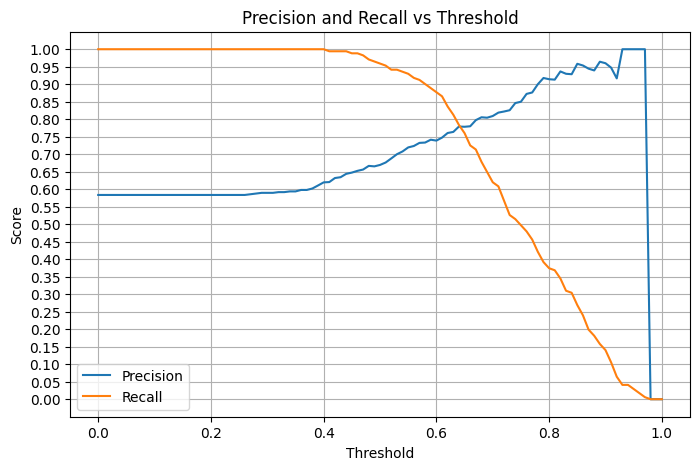

In [100]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.linspace(0, 1, 101)
precision = []
recall = []

for t in thresholds:
    preds = (y_pred >= t)
    precision.append(precision_score(y_val, preds, zero_division=0))
    recall.append(recall_score(y_val, preds))

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.yticks(np.arange(0, 1.05, 0.05))  # y-axis ticks every 0.05 from 0.00 to 1.00
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [101]:
thresholds = np.linspace(0, 1, 101)
f1_scores = []

for t in thresholds:
    preds = (y_pred >= t)
    p = precision_score(y_val, preds, zero_division=0)
    r = recall_score(y_val, preds)
    f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0
    f1_scores.append(f1)

best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best threshold: {best_threshold:.3f}")
print(f"Best F1 score: {best_f1:.3f}")

Best threshold: 0.570
Best F1 score: 0.812


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36


In [102]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
import numpy as np

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx].reset_index(drop=True)
    df_val = df_full_train.iloc[val_idx].reset_index(drop=True)

    X_train = df_train.drop(target_column, axis=1)
    y_train = df_train[target_column]

    X_val = df_val.drop(target_column, axis=1)
    y_val = df_val[target_column]

    
    train_dicts = X_train.to_dict(orient='records')
    val_dicts = X_val.to_dict(orient='records')

    
    dv = DictVectorizer(sparse=False)
    X_train_encoded = dv.fit_transform(train_dicts)
    X_val_encoded = dv.transform(val_dicts)

   
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train)

   
    y_pred = model.predict_proba(X_val_encoded)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

print('AUCs for each fold:', np.round(aucs, 3))
print('Mean AUC:', round(np.mean(aucs), 3))
print('Std AUC:', round(np.std(aucs), 3))


AUCs for each fold: [0.806 0.871 0.775 0.802 0.856]
Mean AUC: 0.822
Std AUC: 0.036



### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1


In [103]:

C_values = [0.000001, 0.001, 1]
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in C_values:
    aucs = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx].reset_index(drop=True)
        df_val = df_full_train.iloc[val_idx].reset_index(drop=True)

        X_train = df_train.drop(target_column, axis=1)
        y_train = df_train[target_column]
        X_val = df_val.drop(target_column, axis=1)
        y_val = df_val[target_column]

        train_dicts = X_train.to_dict(orient='records')
        val_dicts = X_val.to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train_encoded = dv.fit_transform(train_dicts)
        X_val_encoded = dv.transform(val_dicts)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train)

        y_pred = model.predict_proba(X_val_encoded)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print(f"C={C}")
    print("  Mean AUC:", round(np.mean(aucs), 3))
    print("  Std AUC:", round(np.std(aucs), 3))
    print()


C=1e-06
  Mean AUC: 0.56
  Std AUC: 0.024

C=0.001
  Mean AUC: 0.867
  Std AUC: 0.029

C=1
  Mean AUC: 0.822
  Std AUC: 0.036

